In [126]:
#importing all the nesseasary libraries
from collections import Counter,OrderedDict
import ipywidgets as widgets
import itertools
import pandas as pd
import json
from urllib.request import urlopen

In [127]:
#Load projects
url="https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/projects.json"
projects=json.loads(urlopen(url).read())
print(json.dumps(projects[-305],indent=2))

{
  "id": 324,
  "title": "AdverTorch",
  "description": "A Toolbox for Adversarial Robustness Research",
  "tags": [
    "code",
    "library",
    "security",
    "adversarial-learning",
    "adversarial-attacks",
    "adversarial-perturbations"
  ]
}


In [128]:
# Creating a pandas dataframe 
df=pd.DataFrame(projects)
print(f"{len(df)} projects")
df.head(5)

2032 projects


,id,title,description,tags
0,2438,How to Deal with Files in Google Colab: What Y...,How to supercharge your Google Colab experienc...,"[article, google-colab, colab, file-system]"
1,2437,Rasoee,A powerful web and mobile application that ide...,"[api, article, code, dataset, paper, research,..."
2,2436,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,"[article, deep-learning, machine-learning, dim..."
3,2435,Top “Applied Data Science” Papers from ECML-PK...,Explore the innovative world of Machine Learni...,"[article, deep-learning, machine-learning, adv..."
4,2434,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,"[article, code, pytorch, library, 3d, computer..."


In [129]:
#Loading the tags
url1="https://raw.githubusercontent.com/GokuMohandas/applied-ml/main/datasets/tags.json"
tags_dict=OrderedDict(json.loads(urlopen(url1).read()))
print(f"{len(tags_dict)} tags")


400 tags


In [130]:
@widgets.interact(tag=list(tags_dict.keys()))
def display_tag_details(tag='question-answering'):
    print(json.dumps(tags_dict[tag],indent=2))

interactive(children=(Dropdown(description='tag', index=283, options=('3d', 'action-localization', 'action-rec…

In [131]:
#Combining the projects title and descrption separately as feature but we'll combine them to create on input feature

df['text']= df.title+" "+ df.description
df.head(5)

,id,title,description,tags,text
0,2438,How to Deal with Files in Google Colab: What Y...,How to supercharge your Google Colab experienc...,"[article, google-colab, colab, file-system]",How to Deal with Files in Google Colab: What Y...
1,2437,Rasoee,A powerful web and mobile application that ide...,"[api, article, code, dataset, paper, research,...",Rasoee A powerful web and mobile application t...
2,2436,Machine Learning Methods Explained (+ Examples),Most common techniques used in data science pr...,"[article, deep-learning, machine-learning, dim...",Machine Learning Methods Explained (+ Examples...
3,2435,Top “Applied Data Science” Papers from ECML-PK...,Explore the innovative world of Machine Learni...,"[article, deep-learning, machine-learning, adv...",Top “Applied Data Science” Papers from ECML-PK...
4,2434,OpenMMLab Computer Vision,MMCV is a python library for CV research and s...,"[article, code, pytorch, library, 3d, computer...",OpenMMLab Computer Vision MMCV is a python lib...


In [132]:
#Constrains
def filter(l,include=[],exclude=[]):
    """
    Filtering a list using inclution and exclution list of items 
    """
    filtered=[item for item in l if item in include and item not in exclude]
    return filtered

In [133]:
# Inclusion/exclusion criteria for tags
include = list(tags_dict.keys())
exclude = ['machine-learning', 'deep-learning',  'data-science',
           'neural-networks', 'python', 'r', 'visualization']

In [134]:
#Filter tags for each project
df.tags=df.tags.apply(filter,include=include,exclude=exclude)
tags=Counter(itertools.chain.from_iterable(df.tags.values))

In [135]:
@widgets.interact(min_tag_freq=(0,tags.most_common()[0][1]))
def separate_tag_by_freq(min_tag_freq=30):
    tags_above_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] >= min_tag_freq)
    tags_below_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] < min_tag_freq)
    print ("Most popular tags:\n", tags_above_freq.most_common(5))
    print ("\nTags that just made the cut:\n", tags_above_freq.most_common()[-5:])
    print ("\nTags that just missed the cut:\n", tags_below_freq.most_common(5))



interactive(children=(IntSlider(value=30, description='min_tag_freq', max=429), Output()), _dom_classes=('widg…

In [136]:
min_tag_freq = 30
tags_above_freq = Counter(tag for tag in tags.elements()
                          if tags[tag] >= min_tag_freq)
df.tags = df.tags.apply(filter, include=list(tags_above_freq.keys()))


In [137]:
df = df[df.tags.map(len) > 0]
print (f"{len(df)} projects")

1444 projects


# Exploratory data analysis
NOTE: Revisit and re-do EDA when your data grows

In [138]:
!pip install wordcloud

Traceback (most recent call last):
  File "c:\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python39\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [139]:
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from wordcloud import WordCloud,STOPWORDS
warnings.filterwarnings("ignore")

## Tags Per Project
Q. How many tags do the projects have ?

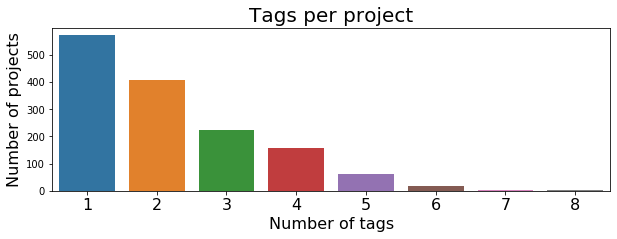

In [140]:
num_tags_per_project=[len(tags) for tags in df.tags]
num_tags,num_projects=zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10,3))
ax=sns.barplot(list(num_tags),list(num_projects))
plt.title("Tags per project",fontsize=20)
plt.xlabel("Number of tags", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

## Tag distrbution
What are the most popular tags?

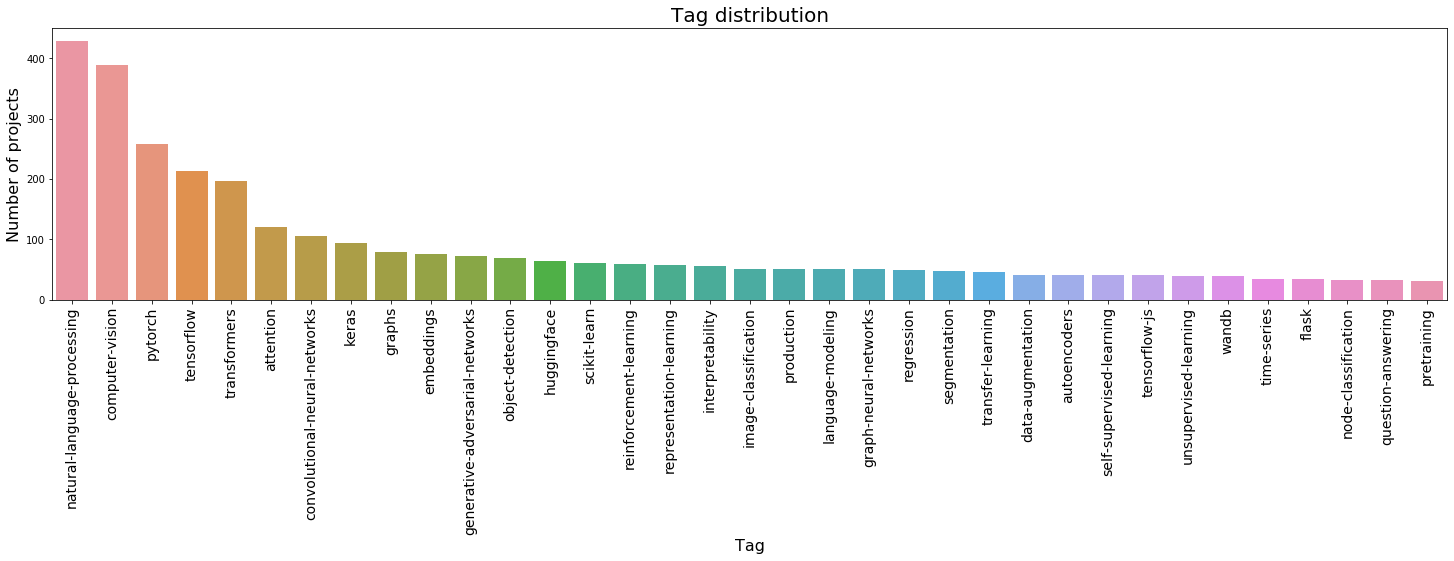

In [141]:
all_tags = list(itertools.chain.from_iterable(df.tags.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

## Wordcloud
Is there enough signal in the title and description that's unique to each tag?

In [142]:
@widgets.interact(tag=list(tags))
def display_word_cloud(tag='pytorch'):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = df[df.tags.apply(lambda tags: tag in tags)]
    text = subset.text.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color='black', collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis('off')
    plt.imshow(cloud)

interactive(children=(Dropdown(description='tag', index=2, options=('natural-language-processing', 'computer-v…

# Splitting

In [143]:
import numpy as np
import random 


In [144]:
seed=42
np.random.seed(seed)
random.seed(seed)

In [145]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.text.to_numpy()
y = df.tags

In [146]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(list(itertools.chain.from_iterable(y)))
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        y_one_hot = np.zeros((len(y), len(self.class_to_index)),dtype=int)
        for i, item in enumerate(y):
            for class_ in item:
                y_one_hot[i][self.class_to_index[class_]] = 1
        return y_one_hot

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            indices = np.where(item == 1)[0]
            classes.append([self.index_to_class[index] for index in indices])
        return classes

    def save(self, fp):
        with open(fp, 'w') as fp:
            contents = {'class_to_index': self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, 'r') as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [147]:
#encode 
label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [148]:

label_encoder.class_to_index

{'attention': 0,
 'autoencoders': 1,
 'computer-vision': 2,
 'convolutional-neural-networks': 3,
 'data-augmentation': 4,
 'embeddings': 5,
 'flask': 6,
 'generative-adversarial-networks': 7,
 'graph-neural-networks': 8,
 'graphs': 9,
 'huggingface': 10,
 'image-classification': 11,
 'interpretability': 12,
 'keras': 13,
 'language-modeling': 14,
 'natural-language-processing': 15,
 'node-classification': 16,
 'object-detection': 17,
 'pretraining': 18,
 'production': 19,
 'pytorch': 20,
 'question-answering': 21,
 'regression': 22,
 'reinforcement-learning': 23,
 'representation-learning': 24,
 'scikit-learn': 25,
 'segmentation': 26,
 'self-supervised-learning': 27,
 'tensorflow': 28,
 'tensorflow-js': 29,
 'time-series': 30,
 'transfer-learning': 31,
 'transformers': 32,
 'unsupervised-learning': 33,
 'wandb': 34}

In [149]:
y = label_encoder.encode(y)


In [150]:
!pip install scikit-multilearn==0.2.0 -q

Traceback (most recent call last):
  File "c:\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python39\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


Naive splitiing

In [151]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix


In [152]:
# Split sizes
train_size=0.7
val_size=0.15
test_size=0.15

In [153]:
# Split (train)
X_train, X_, y_train, y_ = train_test_split(X, y, train_size=train_size)

In [154]:

print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 1010 (0.70)
remaining: 434 (0.30)


In [155]:
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

In [156]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1010 (0.70)
val: 217 (0.15)
test: 217 (0.15)


In [157]:
# Get counts for each class
counts = {}
counts['train_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts['val_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts['test_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [158]:
# View distributions
pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)


,"(15,)","(19,)","(33,)","(21,)","(32,)","(14,)","(2,)","(20,)","(24,)","(5,)",...,"(1,)","(7,)","(11,)","(18,)","(4,)","(6,)","(29,)","(8,)","(31,)","(30,)"
train,314,37,26,26,145,33,274,191,41,55,...,27,50,34,21,33,24,24,32,33,23
val,58,8,4,2,29,8,53,33,7,9,...,3,7,6,3,3,5,7,10,7,4
test,57,6,9,4,22,10,61,34,9,11,...,11,16,11,6,5,5,9,9,6,7


In [159]:
# Adjust counts across splits
for k in counts['val_counts'].keys():
    counts['val_counts'][k] = int(counts['val_counts'][k] * \
        (train_size/val_size))
for k in counts['test_counts'].keys():
    counts['test_counts'][k] = int(counts['test_counts'][k] * \
        (train_size/test_size))

In [160]:
dist_df = pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)
dist_df


,"(15,)","(19,)","(33,)","(21,)","(32,)","(14,)","(2,)","(20,)","(24,)","(5,)",...,"(1,)","(7,)","(11,)","(18,)","(4,)","(6,)","(29,)","(8,)","(31,)","(30,)"
train,314,37,26,26,145,33,274,191,41,55,...,27,50,34,21,33,24,24,32,33,23
val,270,37,18,9,135,37,247,154,32,42,...,14,32,28,14,14,23,32,46,32,18
test,266,28,42,18,102,46,284,158,42,51,...,51,74,51,28,23,23,42,42,28,32


In [161]:
np.mean(np.std(dist_df.to_numpy(), axis=0))

9.936725114942407

Stratified split

In [162]:
from skmultilearn.model_selection import IterativeStratification

In [163]:
def iterative_train_test_split(X, y, train_size):
    """Custom iterative train test split which
    'maintains balanced representation with respect
    to order-th label combinations.'
    """
    stratifier = IterativeStratification(
        n_splits=2, order=1, sample_distribution_per_fold=[1.0-train_size, train_size, ])
    train_indices, test_indices = next(stratifier.split(X, y))
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [164]:
# Get data
X = df.text.to_numpy()
y = df.tags

In [165]:
# Binarize y
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.encode(y)

In [166]:
# Split
X_train, X_, y_train, y_ = iterative_train_test_split(
    X, y, train_size=train_size)
X_val, X_test, y_val, y_test = iterative_train_test_split(
    X_, y_, train_size=0.5)

In [167]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1000 (0.69)
val: 214 (0.15)
test: 230 (0.16)


In [168]:
# Get counts for each class
counts = {}
counts['train_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts['val_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts['test_counts'] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [169]:
# Adjust counts across splits
for k in counts['val_counts'].keys():
    counts['val_counts'][k] = int(counts['val_counts'][k] * \
        (train_size/val_size))
for k in counts['test_counts'].keys():
    counts['test_counts'][k] = int(counts['test_counts'][k] * \
        (train_size/test_size))

In [170]:
# View distributions
pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)

,"(2,)","(4,)","(15,)","(14,)","(30,)","(34,)","(1,)","(26,)","(32,)","(20,)",...,"(28,)","(11,)","(22,)","(8,)","(29,)","(23,)","(31,)","(10,)","(18,)","(12,)"
train,272.0,29.0,300.0,36.0,24.0,27.0,29.0,32.0,145.0,181.0,...,149.0,30.0,34.0,38.0,26.0,41.0,32.0,45.0,21.0,38.0
val,270.0,32.0,298.0,28.0,23.0,28.0,32.0,37.0,112.0,177.0,...,149.0,46.0,32.0,32.0,32.0,42.0,32.0,46.0,23.0,42.0
test,270.0,23.0,303.0,42.0,23.0,28.0,23.0,37.0,126.0,182.0,...,149.0,51.0,37.0,28.0,32.0,42.0,32.0,42.0,18.0,37.0


In [171]:
dist_df = pd.DataFrame({
    'train': counts['train_counts'],
    'val': counts['val_counts'],
    'test': counts['test_counts']
}).T.fillna(0)

In [172]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

3.142338654518357

Iterative stratification essentially creates splits while "trying to maintain balanced representation with respect to order-th label combinations". We used to an order=1 for our iterative split which means we cared about providing representative distribution of each tag across the splits. But we can account for higher-order label relationships as well where we may care about the distribution of label combinations.

# Preporcessing 

In [173]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')
STOPWORDS=stopwords.words('english')
porter=PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KATTUBOINA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
def preprocess(text,lower=True,stem=False,filters="[!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~]",stopwords=STOPWORDS):
    """
    Conditional preprocessing on our text unique to our task.
    """
    if lower:
        text=text.lower()
    

    pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
    text=pattern.sub('', text)

     #spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)
    text = re.sub(filters, r"", text)
    text = re.sub('[^A-Za-z0-9]+', ' ', text) # remove non alphanumeric chars
    text = re.sub(' +', ' ', text)  # remove multiple spaces
    text = text.strip()


    text=re.sub(r'http\S+', '', text)


    if stem:
        text=" ".join([porter.stem(word) for word in text.split(' ')])
    

    return text

In [175]:
@widgets.interact(lower=True,stem=False)
def display_preprocessed_text(lower,stem):
    text="Conditional image generation using Variational Autoencoders and GANs."
    preprocessed_text = preprocess(text=text, lower=lower, stem=stem)
    print (preprocessed_text) 


interactive(children=(Checkbox(value=True, description='lower'), Checkbox(value=False, description='stem'), Ou…

In [176]:
#Applying the changes to our dataset
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=False)
print (f"{df.text.values[0]}\n{preprocessed_df.text.values[0]}")

Albumentations Fast image augmentation library and easy to use wrapper around other libraries.
albumentations fast image augmentation library easy use wrapper around libraries


# Model Building

## Some helpfull functions

In [177]:
from sklearn.metrics import precision_recall_fscore_support
import torch

In [178]:
def set_seed(seed=1234):
    """ Setting seed for reproducibility """

    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) #For multi-gpu training

In [179]:
def get_data_splits(dftrain_size=0.7):
    X=df.text.to_numpy()
    y=df.tags


    #Binarize y
    label_encoder=LabelEncoder()
    label_encoder.fit(y)
    y=label_encoder.encode(y)

    #Spliting the data 
    X_train, X_, y_train, y_ = iterative_train_test_split(X, y, train_size=train_size)
    X_val, X_test, y_val, y_test = iterative_train_test_split(X_, y_, train_size=0.5)

    return X_train, X_val, X_test, y_train, y_val, y_test,label_encoder
    


In [180]:
class Trainer(object):
    def __init__(self, model, device, loss_fn=None, optimizer=None, scheduler=None):

        # Set params
        self.model = model
        self.device = device
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler

    def train_step(self, dataloader):
        """Train step."""
        # Set model to train mode
        self.model.train()
        loss = 0.0

        # Iterate over train batches
        for i, batch in enumerate(dataloader):

            # Step
            batch = [item.to(self.device) for item in batch]  # Set device
            inputs, targets = batch[:-1], batch[-1]
            self.optimizer.zero_grad()  # Reset gradients
            z = self.model(inputs)  # Forward pass
            J = self.loss_fn(z, targets)  # Define loss
            J.backward()  # Backward pass
            self.optimizer.step()  # Update weights

            # Cumulative Metrics
            loss += (J.detach().item() - loss) / (i + 1)

        return loss

    def eval_step(self, dataloader):
        """Validation or test step."""
        # Set model to eval mode
        self.model.eval()
        loss = 0.0
        y_trues, y_probs = [], []

        # Iterate over val batches
        with torch.no_grad():
            for i, batch in enumerate(dataloader):

                # Step
                batch = [item.to(self.device) for item in batch]  # Set device
                inputs, y_true = batch[:-1], batch[-1]
                z = self.model(inputs)  # Forward pass
                J = self.loss_fn(z, y_true).item()

                # Cumulative Metrics
                loss += (J - loss) / (i + 1)

                # Store outputs
                y_prob = torch.sigmoid(z).cpu().numpy()
                y_probs.extend(y_prob)
                y_trues.extend(y_true.cpu().numpy())

        return loss, np.vstack(y_trues), np.vstack(y_probs)

    def predict_step(self, dataloader):
        """Prediction step."""
        # Set model to eval mode
        self.model.eval()
        y_probs = []

        # Iterate over val batches
        with torch.no_grad():
            for i, batch in enumerate(dataloader):

                # Forward pass w/ inputs
                inputs, targets = batch[:-1], batch[-1]
                y_prob = self.model(inputs)

                # Store outputs
                y_probs.extend(y_prob)

        return np.vstack(y_probs)

    def train(self, num_epochs, patience, train_dataloader, val_dataloader):
        best_val_loss = np.inf
        for epoch in range(num_epochs):
            # Steps
            train_loss = self.train_step(dataloader=train_dataloader)
            val_loss, _, _ = self.eval_step(dataloader=val_dataloader)
            self.scheduler.step(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = self.model
                _patience = patience  # reset _patience
            else:
                _patience -= 1
            if not _patience:  # 0
                print("Stopping early!")
                break

            # Logging
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.5f}, "
                f"val_loss: {val_loss:.5f}, "
                f"lr: {self.optimizer.param_groups[0]['lr']:.2E}, "
                f"_patience: {_patience}"
            )
        return best_model

In [181]:
def get_performance(y_true,y_pred,classes):
    """Getting the per class performance"""
    #Getting metrics
    performance={'overall':{}, 'class':{}}
    metrics=precision_recall_fscore_support(y_true,y_pred)


    #overall performance 
    performance['overall']['precision'] = np.mean(metrics[0])
    performance['overall']['recall'] = np.mean(metrics[1])
    performance['overall']['f1'] = np.mean(metrics[2])
    performance['overall']['num_samples'] = np.float64(np.sum(metrics[3]))



    # Per-class performance
    for i in range(len(classes)):
        performance['class'][classes[i]] = {
            "precision": metrics[0][i],
            "recall": metrics[1][i],
            "f1": metrics[2][i],
            "num_samples": np.float64(metrics[3][i])
        }

    

    return performance





## Random 
What will the random performance look like


In [182]:
set_seed()

In [183]:
#Getting the data splits
preprocessed_df=df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1000,), y_train: (1000, 35)
X_val: (227,), y_val: (227, 35)
X_test: (217,), y_test: (217, 35)


In [184]:
# Label encoder
print (label_encoder)
print (label_encoder.classes)

<LabelEncoder(num_classes=35)>
['attention', 'autoencoders', 'computer-vision', 'convolutional-neural-networks', 'data-augmentation', 'embeddings', 'flask', 'generative-adversarial-networks', 'graph-neural-networks', 'graphs', 'huggingface', 'image-classification', 'interpretability', 'keras', 'language-modeling', 'natural-language-processing', 'node-classification', 'object-detection', 'pretraining', 'production', 'pytorch', 'question-answering', 'regression', 'reinforcement-learning', 'representation-learning', 'scikit-learn', 'segmentation', 'self-supervised-learning', 'tensorflow', 'tensorflow-js', 'time-series', 'transfer-learning', 'transformers', 'unsupervised-learning', 'wandb']


In [185]:

# Generate random predictions
y_pred = np.random.randint(low=0, high=2, size=(len(y_test), len(label_encoder.classes)))
print (y_pred.shape)
print (y_pred[0:5])

(217, 35)
[[0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1]
 [1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1]
 [0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0]
 [0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0]]


In [186]:
# Evaluate
performance = get_performance(
    y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=2))

{
  "precision": 0.0662941602216066,
  "recall": 0.5065299488415251,
  "f1": 0.10819194263879019,
  "num_samples": 480.0
}


In [187]:

# Percentage of 1s (tag presence)
tag_p = np.sum(np.sum(y_train)) / (len(y_train) * len(label_encoder.classes))
print (tag_p)

0.06291428571428571


In [188]:
# Generate weighted random predictions
y_pred = np.random.choice(
    np.arange(0, 2), size=(len(y_test), len(label_encoder.classes)),
    p=[1-tag_p, tag_p])

In [189]:
# Validate percentage
np.sum(np.sum(y_pred)) / (len(y_pred) * len(label_encoder.classes))

0.06240947992100066

In [190]:
# Evaluate
performance = get_performance(
    y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=2))


{
  "precision": 0.060484184552507536,
  "recall": 0.053727634571230636,
  "f1": 0.048704498064854516,
  "num_samples": 480.0
}


## Rule Based 
We need to signals our inputs

In [191]:
set_seed()

In [192]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [193]:
# Restrict to relevant tags
print (len(tags_dict))
tags_dict = {tag: tags_dict[tag] for tag in label_encoder.classes}
print (len(tags_dict))

400
35


In [194]:
#Map aliases
aliases={}
for tag,values in tags_dict.items():
    aliases[preprocess(tag)]=tag
    for alias in values['aliases']:
        aliases[preprocess(alias)]=tag

aliases

{'attention': 'attention',
 'autoencoders': 'autoencoders',
 'ae': 'autoencoders',
 'computer vision': 'computer-vision',
 'cv': 'computer-vision',
 'vision': 'computer-vision',
 'convolutional neural networks': 'convolutional-neural-networks',
 'cnn': 'convolutional-neural-networks',
 'data augmentation': 'data-augmentation',
 'embeddings': 'embeddings',
 'flask': 'flask',
 'generative adversarial networks': 'generative-adversarial-networks',
 'gan': 'generative-adversarial-networks',
 'graph neural networks': 'graph-neural-networks',
 'gnn': 'graph-neural-networks',
 'graphs': 'graphs',
 'huggingface': 'huggingface',
 'image classification': 'image-classification',
 'interpretability': 'interpretability',
 'keras': 'keras',
 'language modeling': 'language-modeling',
 'lm': 'language-modeling',
 'natural language processing': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classification': 'node-classification',
 '

In [195]:
def get_classes(text,aliases,tags_dict):
    """
    if a token matches an alias ,then add the corresponding tag class
    """
    classes=[]
    for alias,tag in aliases.items():
        if alias in text:
            classes.append(tag)
            for parent in tags_dict[tag]["parents"]:
                classes.append(parent)
        
    
    return list(set(classes))

In [196]:
#Sample for above function
# Sample
text = "This project extends gans for data augmentation specifically for object detection tasks."
get_classes(text=preprocess(text), aliases=aliases, tags_dict=tags_dict)

['object-detection',
 'generative-adversarial-networks',
 'data-augmentation',
 'computer-vision']

In [197]:
#Prediction 
y_pred=[]
for text in X_test:
    classes=get_classes(text,aliases,tags_dict)
    y_pred.append(classes)
    


In [198]:
#Encoding Labels
y_pred=label_encoder.encode(y_pred)

In [199]:
performance = get_performance(y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=4))

{
    "precision": 0.3958730158730158,
    "recall": 0.10910285028326902,
    "f1": 0.15424993307346246,
    "num_samples": 480.0
}


In [200]:
# Inspection
tag = "transformers"
print (json.dumps(performance["class"][tag], indent=2))

{
  "precision": 1.0,
  "recall": 0.12,
  "f1": 0.21428571428571425,
  "num_samples": 25.0
}


### Stemming 

In [201]:
print (aliases[preprocess('gan')])
# print (aliases[preprocess('gans')]) # this won't find any match
print (aliases[preprocess('generative adversarial networks')])
# print (aliases[preprocess('generative adversarial network')]) # this won't find any match

generative-adversarial-networks
generative-adversarial-networks


In [202]:
print (porter.stem("democracy"))
print (porter.stem("democracies"))

democraci
democraci


In [203]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [204]:
# Map aliases
aliases = {}
for tag, values in tags_dict.items():
    aliases[preprocess(tag, stem=True)] = tag
    for alias in values['aliases']:
        aliases[preprocess(alias, stem=True)] = tag
aliases

{'attent': 'attention',
 'autoencod': 'autoencoders',
 'ae': 'autoencoders',
 'comput vision': 'computer-vision',
 'cv': 'computer-vision',
 'vision': 'computer-vision',
 'convolut neural network': 'convolutional-neural-networks',
 'cnn': 'convolutional-neural-networks',
 'data augment': 'data-augmentation',
 'embed': 'embeddings',
 'flask': 'flask',
 'gener adversari network': 'generative-adversarial-networks',
 'gan': 'generative-adversarial-networks',
 'graph neural network': 'graph-neural-networks',
 'gnn': 'graph-neural-networks',
 'graph': 'graphs',
 'huggingfac': 'huggingface',
 'imag classif': 'image-classification',
 'interpret': 'interpretability',
 'kera': 'keras',
 'languag model': 'language-modeling',
 'lm': 'language-modeling',
 'natur languag process': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classif': 'node-classification',
 'object detect': 'object-detection',
 'pretrain': 'pretraining',
 'pr

In [205]:
# Checks (we will write proper tests soon)
print (aliases[preprocess('gan', stem=True)])
print (aliases[preprocess('gans', stem=True)])
print (aliases[preprocess('generative adversarial network', stem=True)])
print (aliases[preprocess('generative adversarial networks', stem=True)])

generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks


In [206]:
# Sample
text = "This project extends gans for data augmentation specifically for object detection tasks."
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

['object-detection',
 'generative-adversarial-networks',
 'data-augmentation',
 'computer-vision']

In [207]:
# Prediction
y_pred = []
for text in X_test:
    classes = get_classes(text, aliases, tags_dict)
    y_pred.append(classes)

In [208]:
# Encode labels
y_pred = label_encoder.encode(y_pred)

#### Evaluation

In [209]:
# Evaluate
performance = get_performance(y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=4))

{
    "precision": 0.4197732426303855,
    "recall": 0.09591888816059155,
    "f1": 0.14942598936879561,
    "num_samples": 473.0
}


In [210]:
# Inspection
tag = "transformers"
print (json.dumps(performance["class"][tag], indent=2))

{
  "precision": 0.8888888888888888,
  "recall": 0.2962962962962963,
  "f1": 0.4444444444444444,
  "num_samples": 27.0
}


In [211]:
# TP, FP, FN samples
index = label_encoder.class_to_index[tag]
tp, fp, fn = [], [], []
for i in range(len(y_test)):
    true = y_test[i][index]
    pred = y_pred[i][index]
    if true and pred:
        tp.append(i)
    elif not true and pred:
        fp.append(i)
    elif true and not pred:
        fn.append(i)

In [212]:
print (tp)
print (fp)
print (fn)

[1, 46, 94, 165, 169, 190, 194, 199]
[49]
[4, 14, 15, 18, 28, 54, 61, 63, 72, 75, 89, 99, 137, 141, 142, 160, 163, 174, 206]


In [213]:
index = tp[0]
print (X_test[index])
print (f"true: {label_encoder.decode([y_test[index]])[0]}")
print (f"pred: {label_encoder.decode([y_pred[index]])[0]}\n")

Insight Project Insight is designed to create NLP as a service with code base for both front end GUI (streamlit) and backend server (FastAPI) the usage of transformers 
true: ['attention', 'huggingface', 'natural-language-processing', 'pytorch', 'transfer-learning', 'transformers']
pred: ['natural-language-processing', 'transformers']



In [214]:
# Sorted tags
sorted_tags_by_f1 = OrderedDict(sorted(
        performance['class'].items(), key=lambda tag: tag[1]['f1'], reverse=True))

In [215]:
@widgets.interact(tag=list(sorted_tags_by_f1.keys()))
def display_tag_analysis(tag='transformers'):
    # Performance
    print (json.dumps(performance["class"][tag], indent=2))

    # TP, FP, FN samples
    index = label_encoder.class_to_index[tag]
    tp, fp, fn = [], [], []
    for i in range(len(y_test)):
        true = y_test[i][index]
        pred = y_pred[i][index]
        if true and pred:
            tp.append(i)
        elif not true and pred:
            fp.append(i)
        elif true and not pred:
            fn.append(i)

    # Samples
    num_samples = 3
    if len(tp):
        print ("\n=== True positives ===\n")
        for i in tp[:num_samples]:
            print (f"  {X_test[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fp):
        print ("=== False positives ===\n")
        for i in fp[:num_samples]:
            print (f"  {X_test[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fn):
        print ("=== False negatives ===\n")
        for i in fn[:num_samples]:
            print (f"  {X_test[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=3, options=('interpretability', 'segmentation', 'produ…

#### Inference

In [216]:
# Infer
text = "Transfer learning with transformers for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn transform self supervis learn


['transfer-learning',
 'natural-language-processing',
 'transformers',
 'self-supervised-learning']

In [217]:
# Infer
text = "Transfer learning with BERT for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn bert self supervis learn


['transfer-learning', 'self-supervised-learning']

Limitations : Failed to learned or generalize any imlpicit pattern to poredit the labels becaouse we treat the tokens as isolated entiries

## Simple ML

In [218]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC


In [219]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MultiLabelBinarizer

In [220]:
#Setting seeds
set_seed()

In [221]:
#Getting data splits
preprocessed_df=df.copy()
preprocessed_df.text=preprocessed_df.text.apply(preprocess,lower=True,stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [222]:
#Using Tf-idf 
vectorizer=TfidfVectorizer()
print(X_train[0])
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
print (X_train.shape)
print (X_train[0])

Albumentations Fast image augmentation library and easy to use wrapper around other libraries.
(1000, 3605)
  (0, 1861)	0.35101282857580157
  (0, 2276)	0.3322638000685066
  (0, 260)	0.312389028946533
  (0, 3573)	0.3634469148077632
  (0, 3414)	0.22983052113836
  (0, 3256)	0.10614373238476807
  (0, 1012)	0.2636058411307363
  (0, 192)	0.10345779731276887
  (0, 1862)	0.2072370467198702
  (0, 304)	0.2659773634649721
  (0, 1596)	0.18753138760686572
  (0, 1222)	0.2861993155492261
  (0, 153)	0.4020707144370318


In [223]:
def fit_and_evaluate(model):
    """Fit and evaluate each model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    performance = get_performance(
        y_true=y_test, y_pred=y_pred, classes=list(label_encoder.classes))
    return performance['overall']

In [224]:
# Models
performance = {}
performance['logistic-regression'] = fit_and_evaluate(OneVsRestClassifier(
    LogisticRegression(), n_jobs=1))
performance['k-nearest-neighbors'] = fit_and_evaluate(
    KNeighborsClassifier())
performance['random-forest'] = fit_and_evaluate(
    RandomForestClassifier(n_jobs=-1))
performance['gradient-boosting-machine'] = fit_and_evaluate(OneVsRestClassifier(
    GradientBoostingClassifier()))
performance['support-vector-machine'] = fit_and_evaluate(OneVsRestClassifier(
    LinearSVC(), n_jobs=-1))
print (json.dumps(performance, indent=2))

{
  "logistic-regression": {
    "precision": 0.3312317312317312,
    "recall": 0.06427712804436943,
    "f1": 0.10210451648045632,
    "num_samples": 480.0
  },
  "k-nearest-neighbors": {
    "precision": 0.6531082519964507,
    "recall": 0.3227342860341629,
    "f1": 0.41299426353846336,
    "num_samples": 480.0
  },
  "random-forest": {
    "precision": 0.5304325238867477,
    "recall": 0.20684071484071484,
    "f1": 0.2838581472925646,
    "num_samples": 480.0
  },
  "gradient-boosting-machine": {
    "precision": 0.7445866383444024,
    "recall": 0.4956736941903197,
    "f1": 0.5807018407182406,
    "num_samples": 480.0
  },
  "support-vector-machine": {
    "precision": 0.8026174159136747,
    "recall": 0.3700476348364279,
    "f1": 0.48829320873570664,
    "num_samples": 480.0
  }
}


Limitations:
TF-IDF representations don't encapsulate much signal beyond frequency but we require more fine-grained token representations.

## CNN w/ Embeddings

In [225]:
import math 
import torch
import torch.nn as nn
import torch.nn.functional as F 

In [226]:
#Setting the seeds
set_seed()

In [227]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
X_test_raw = X_test

In [228]:
# Set device
cuda = True
device = torch.device('cuda' if (
    torch.cuda.is_available() and cuda) else 'cpu')
torch.set_default_tensor_type('torch.FloatTensor')
if device.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
print (device)

cuda


In [229]:
class Tokenizer(object):
    def __init__(self, char_level, num_tokens=None, 
                 pad_token='<PAD>', oov_token='<UNK>',
                 token_to_index=None):
        self.char_level = char_level
        self.separator = '' if self.char_level else ' '
        if num_tokens: num_tokens -= 2 # pad + unk tokens
        self.num_tokens = num_tokens
        self.oov_token = oov_token
        if not token_to_index:
            token_to_index = {'<PAD>': 0, '<UNK>': 1}
        self.token_to_index = token_to_index
        self.index_to_token = {v: k for k, v in self.token_to_index.items()}

    def __len__(self):
        return len(self.token_to_index)

    def __str__(self):
        return f"<Tokenizer(num_tokens={len(self)})>"

    def fit_on_texts(self, texts):
        if self.char_level:
            all_tokens = [token for text in texts for token in text]
        if not self.char_level:
            all_tokens = [token for text in texts for token in text.split(' ')]
        counts = Counter(all_tokens).most_common(self.num_tokens)
        self.min_token_freq = counts[-1][1]
        for token, count in counts:
            index = len(self)
            self.token_to_index[token] = index
            self.index_to_token[index] = token
        return self

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            if not self.char_level:
                text = text.split(' ')
            sequence = []
            for token in text:
                sequence.append(self.token_to_index.get(
                    token, self.token_to_index[self.oov_token]))
            sequences.append(np.asarray(sequence))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for sequence in sequences:
            text = []
            for index in sequence:
                text.append(self.index_to_token.get(index, self.oov_token))
            texts.append(self.separator.join([token for token in text]))
        return texts

    def save(self, fp):
        with open(fp, 'w') as fp:
            contents = {
                'char_level': self.char_level,
                'oov_token': self.oov_token,
                'token_to_index': self.token_to_index
            }
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, 'r') as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [230]:
# Tokenize
char_level = True
tokenizer = Tokenizer(char_level=char_level)
tokenizer.fit_on_texts(texts=X_train)
vocab_size = len(tokenizer)
print (tokenizer)

<Tokenizer(num_tokens=136)>


In [231]:
tokenizer.token_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 ' ': 2,
 'e': 3,
 'n': 4,
 'i': 5,
 't': 6,
 'a': 7,
 'o': 8,
 'r': 9,
 's': 10,
 'l': 11,
 'c': 12,
 'd': 13,
 'g': 14,
 'h': 15,
 'm': 16,
 'u': 17,
 'p': 18,
 'f': 19,
 'y': 20,
 'w': 21,
 'b': 22,
 'T': 23,
 'v': 24,
 '.': 25,
 'A': 26,
 '-': 27,
 'L': 28,
 'k': 29,
 'P': 30,
 'S': 31,
 'N': 32,
 'C': 33,
 'M': 34,
 'D': 35,
 'I': 36,
 ',': 37,
 'x': 38,
 'R': 39,
 'F': 40,
 'G': 41,
 'E': 42,
 'B': 43,
 ':': 44,
 '2': 45,
 'O': 46,
 'z': 47,
 'H': 48,
 'W': 49,
 '0': 50,
 'V': 51,
 '(': 52,
 ')': 53,
 'j': 54,
 'U': 55,
 'K': 56,
 'q': 57,
 '1': 58,
 '"': 59,
 'Q': 60,
 '\r': 61,
 '\n': 62,
 '/': 63,
 '&': 64,
 'Y': 65,
 '3': 66,
 '+': 67,
 "'": 68,
 '?': 69,
 'J': 70,
 '5': 71,
 '9': 72,
 'X': 73,
 '8': 74,
 '6': 75,
 '4': 76,
 '’': 77,
 '!': 78,
 'Z': 79,
 '—': 80,
 '7': 81,
 '“': 82,
 '”': 83,
 '|': 84,
 '🤗': 85,
 '️': 86,
 '%': 87,
 '=': 88,
 '–': 89,
 '💻': 90,
 '❤': 91,
 '_': 92,
 '🎨': 93,
 '>': 94,
 '🌊': 95,
 '^': 96,
 '🚗': 97,
 '🕶': 98,
 '<': 99,


In [232]:
# Convert texts to sequences of indices
# Convert texts to sequences of indices
X_train = np.array(tokenizer.texts_to_sequences(X_train))
X_val = np.array(tokenizer.texts_to_sequences(X_val))
X_test = np.array(tokenizer.texts_to_sequences(X_test))
preprocessed_text = tokenizer.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenized) → {X_train[0]}")

Text to indices:
  (preprocessed) → Albumentations Fast image augmentation library and easy to use wrapper around other libraries.
  (tokenized) → [26 11 22 17 16  3  4  6  7  6  5  8  4 10  2 40  7 10  6  2  5 16  7 14
  3  2  7 17 14 16  3  4  6  7  6  5  8  4  2 11  5 22  9  7  9 20  2  7
  4 13  2  3  7 10 20  2  6  8  2 17 10  3  2 21  9  7 18 18  3  9  2  7
  9  8 17  4 13  2  8  6 15  3  9  2 11  5 22  9  7  9  5  3 10 25]


In [233]:
# Class weights
counts = np.bincount([label_encoder.class_to_index[class_] for class_ in all_tags])
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [120  41 388 106  41  75  34  73  51  78  64  51  55  93  51 429  33  69
  30  51 258  32  49  59  57  60  48  40 213  40  34  46 196  39  39],
class weights: {0: 0.008333333333333333, 1: 0.024390243902439025, 2: 0.002577319587628866, 3: 0.009433962264150943, 4: 0.024390243902439025, 5: 0.013333333333333334, 6: 0.029411764705882353, 7: 0.0136986301369863, 8: 0.0196078431372549, 9: 0.01282051282051282, 10: 0.015625, 11: 0.0196078431372549, 12: 0.01818181818181818, 13: 0.010752688172043012, 14: 0.0196078431372549, 15: 0.002331002331002331, 16: 0.030303030303030304, 17: 0.014492753623188406, 18: 0.03333333333333333, 19: 0.0196078431372549, 20: 0.003875968992248062, 21: 0.03125, 22: 0.02040816326530612, 23: 0.01694915254237288, 24: 0.017543859649122806, 25: 0.016666666666666666, 26: 0.020833333333333332, 27: 0.025, 28: 0.004694835680751174, 29: 0.025, 30: 0.029411764705882353, 31: 0.021739130434782608, 32: 0.00510204081632653, 33: 0.02564102564102564, 34: 0.02564102564102564}

In [234]:
def pad_sequences(sequences, max_seq_len=0):
    """Pad sequences to max length in sequence."""
    max_seq_len = max(max_seq_len, max(len(sequence) for sequence in sequences))
    padded_sequences = np.zeros((len(sequences), max_seq_len))
    for i, sequence in enumerate(sequences):
        padded_sequences[i][:len(sequence)] = sequence
    return padded_sequences

In [235]:
class CNNTextDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, max_filter_size):
        self.X = X
        self.y = y
        self.max_filter_size = max_filter_size

    def __len__(self):
        return len(self.y)

    def __str__(self):
        return f"<Dataset(N={len(self)})>"

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return [X, y]

    def collate_fn(self, batch):
        """Processing on a batch."""
        # Get inputs
        batch = np.array(batch, dtype=object)
        X = batch[:, 0]
        y = np.stack(batch[:, 1], axis=0)

        # Pad inputs
        X = pad_sequences(sequences=X, max_seq_len=self.max_filter_size)

        # Cast
        X = torch.LongTensor(X.astype(np.int32))
        y = torch.FloatTensor(y.astype(np.int32))

        return X, y

    def create_dataloader(self, batch_size, shuffle=False, drop_last=False):
        return torch.utils.data.DataLoader(
            dataset=self,
            batch_size=batch_size,
            collate_fn=self.collate_fn,
            shuffle=shuffle,
            drop_last=drop_last,
            pin_memory=True)



In [236]:
# Create datasets
filter_sizes = list(range(1, 11))
train_dataset = CNNTextDataset(
    X=X_train, y=y_train, max_filter_size=max(filter_sizes))
val_dataset = CNNTextDataset(
    X=X_val, y=y_val, max_filter_size=max(filter_sizes))
test_dataset = CNNTextDataset(
    X=X_test, y=y_test, max_filter_size=max(filter_sizes))
print ("Data splits:\n"
    f"  Train dataset:{train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point:\n"
    f"  X: {train_dataset[0][0]}\n"
    f"  y: {train_dataset[0][1]}")

Data splits:
  Train dataset:<Dataset(N=1000)>
  Val dataset: <Dataset(N=227)>
  Test dataset: <Dataset(N=217)>
Sample point:
  X: [26 11 22 17 16  3  4  6  7  6  5  8  4 10  2 40  7 10  6  2  5 16  7 14
  3  2  7 17 14 16  3  4  6  7  6  5  8  4  2 11  5 22  9  7  9 20  2  7
  4 13  2  3  7 10 20  2  6  8  2 17 10  3  2 21  9  7 18 18  3  9  2  7
  9  8 17  4 13  2  8  6 15  3  9  2 11  5 22  9  7  9  5  3 10 25]
  y: [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [237]:

# Create dataloaders
batch_size = 128
train_dataloader = train_dataset.create_dataloader(
    batch_size=batch_size)
val_dataloader = val_dataset.create_dataloader(
    batch_size=batch_size)
test_dataloader = test_dataset.create_dataloader(
    batch_size=batch_size)
batch_X, batch_y = next(iter(train_dataloader))
print ("Sample batch:\n"
    f"  X: {list(batch_X.size())}\n"
    f"  y: {list(batch_y.size())}")

Sample batch:
  X: [128, 226]
  y: [128, 35]


In [238]:
# Arguments
embedding_dim = 128
num_filters = 128
hidden_dim = 128
dropout_p = 0.5

In [239]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, num_filters, filter_sizes,
                 hidden_dim, dropout_p, num_classes, padding_idx=0):
        super(CNN, self).__init__()

        # Initialize embeddings
        self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx)

        # Conv weights
        self.filter_sizes = filter_sizes
        self.conv = nn.ModuleList(
            [nn.Conv1d(in_channels=embedding_dim,
                       out_channels=num_filters,
                       kernel_size=f) for f in filter_sizes])

        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(num_filters*len(filter_sizes), hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs, channel_first=False):

        # Embed
        x_in, = inputs
        x_in = self.embeddings(x_in)
        if not channel_first:
            x_in = x_in.transpose(1, 2)  # (N, channels, sequence length)

        z = []
        max_seq_len = x_in.shape[2]
        for i, f in enumerate(self.filter_sizes):

            # `SAME` padding
            padding_left = int(
                (self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2)
            padding_right = int(math.ceil(
                (self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2))

            # Conv
            _z = self.conv[i](F.pad(x_in, (padding_left, padding_right)))

            # Pool
            _z = F.max_pool1d(_z, _z.size(2)).squeeze(2)
            z.append(_z)

        # Concat outputs
        z = torch.cat(z, 1)

        # FC
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)

        return z

In [240]:
# Initialize model
model = CNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    num_filters=num_filters, filter_sizes=filter_sizes,
    hidden_dim=hidden_dim, dropout_p=dropout_p,
    num_classes=num_classes)
model = model.to(device)
print (model.named_parameters)

<bound method Module.named_parameters of CNN(
  (embeddings): Embedding(136, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


In [241]:
# Arguments
lr = 2e-4
num_epochs = 200
patience = 10

In [242]:
# Define loss
class_weights_tensor = torch.Tensor(np.array(list(class_weights.values())))
loss_fn = nn.BCEWithLogitsLoss(weight=class_weights_tensor)

In [243]:
# Define optimizer & scheduler
# Define optimizer & scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=5)

In [244]:
# Trainer module
trainer = Trainer(
    model=model, device=device, loss_fn=loss_fn, 
    optimizer=optimizer, scheduler=scheduler)

In [245]:
# Train
best_model = trainer.train(
    num_epochs, patience, train_dataloader, val_dataloader)

Epoch: 1 | train_loss: 0.00813, val_loss: 0.00326, lr: 2.00E-04, _patience: 10
Epoch: 2 | train_loss: 0.00440, val_loss: 0.00280, lr: 2.00E-04, _patience: 10
Epoch: 3 | train_loss: 0.00414, val_loss: 0.00296, lr: 2.00E-04, _patience: 9
Epoch: 4 | train_loss: 0.00397, val_loss: 0.00283, lr: 2.00E-04, _patience: 8
Epoch: 5 | train_loss: 0.00370, val_loss: 0.00266, lr: 2.00E-04, _patience: 10
Epoch: 6 | train_loss: 0.00347, val_loss: 0.00260, lr: 2.00E-04, _patience: 10
Epoch: 7 | train_loss: 0.00336, val_loss: 0.00258, lr: 2.00E-04, _patience: 10
Epoch: 8 | train_loss: 0.00324, val_loss: 0.00256, lr: 2.00E-04, _patience: 10
Epoch: 9 | train_loss: 0.00317, val_loss: 0.00254, lr: 2.00E-04, _patience: 10
Epoch: 10 | train_loss: 0.00300, val_loss: 0.00251, lr: 2.00E-04, _patience: 10
Epoch: 11 | train_loss: 0.00301, val_loss: 0.00248, lr: 2.00E-04, _patience: 10
Epoch: 12 | train_loss: 0.00292, val_loss: 0.00245, lr: 2.00E-04, _patience: 10
Epoch: 13 | train_loss: 0.00286, val_loss: 0.00242,

### Evaluation 

In [247]:
from pathlib import Path
from sklearn.metrics import precision_recall_curve

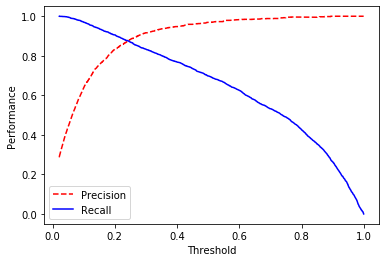

In [248]:
#Threshold-PR curve
train_loss, y_true, y_prob = trainer.eval_step(dataloader=train_dataloader)
precisions, recalls, thresholds = precision_recall_curve(y_true.ravel(), y_prob.ravel())
plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label="Recall")
plt.ylabel("Performance")
plt.xlabel("Threshold")
plt.legend(loc='best')

In [249]:
# Determining the best threshold
def find_best_threshold(y_true, y_prob):
    """Find the best threshold for maximum F1."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1s = (2 * precisions * recalls) / (precisions + recalls)
    return thresholds[np.argmax(f1s)]

In [250]:
# Best threshold for f1
threshold = find_best_threshold(y_true.ravel(), y_prob.ravel())
threshold

0.25544426

In [251]:
# Determine predictions using threshold
test_loss, y_true, y_prob = trainer.eval_step(dataloader=test_dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

In [252]:
# Evaluate
performance = get_performance(
    y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=2))

{
  "precision": 0.8382002761132143,
  "recall": 0.4829912821168979,
  "f1": 0.5778213488459711,
  "num_samples": 480.0
}


In [253]:
@widgets.interact(tag=list(sorted_tags_by_f1.keys()))
def display_tag_analysis(tag='transformers'):
    # Performance
    print (json.dumps(performance["class"][tag], indent=2))
    
    # TP, FP, FN samples
    index = label_encoder.class_to_index[tag]
    tp, fp, fn = [], [], []
    for i in range(len(y_test)):
        true = y_test[i][index]
        pred = y_pred[i][index]
        if true and pred:
            tp.append(i)
        elif not true and pred:
            fp.append(i)
        elif true and not pred:
            fn.append(i)
            
    # Samples
    num_samples = 3
    if len(tp): 
        print ("\n=== True positives ===\n")
        for i in tp[:num_samples]:        
            print (f"  {X_test_raw[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fp): 
        print ("=== False positives ===\n")
        for i in fp[:num_samples]:        
            print (f"  {X_test_raw[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fn): 
        print ("=== False negatives ===\n")
        for i in fn[:num_samples]:        
            print (f"  {X_test_raw[i]}") 
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=3, options=('interpretability', 'segmentation', 'produ…

In [254]:
# Save artifacts
dir = Path("cnn")
dir.mkdir(parents=True, exist_ok=True)
tokenizer.save(fp=Path(dir, 'tokenzier.json'))
label_encoder.save(fp=Path(dir, 'label_encoder.json'))
torch.save(best_model.state_dict(), Path(dir, 'model.pt'))
with open(Path(dir, 'performance.json'), "w") as fp:
    json.dump(performance, indent=2, sort_keys=False, fp=fp)

### Inference

In [255]:
# Load artifacts
device = torch.device("cpu")
tokenizer = Tokenizer.load(fp=Path(dir, 'tokenzier.json'))
label_encoder = LabelEncoder.load(fp=Path(dir, 'label_encoder.json'))
model = CNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    num_filters=num_filters, filter_sizes=filter_sizes,
    hidden_dim=hidden_dim, dropout_p=dropout_p,
    num_classes=num_classes)
model.load_state_dict(torch.load(Path(dir, 'model.pt'), map_location=device))
model.to(device)

CNN(
  (embeddings): Embedding(136, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)

In [256]:
# Initialize trainer
trainer = Trainer(model=model, device=device)

In [257]:
# Dataloader
text = "Transfer learning with BERT for self-supervised learning"
X = np.array(tokenizer.texts_to_sequences([preprocess(text)]))
y_filler = label_encoder.encode([np.array([label_encoder.classes[0]]*len(X))])
dataset = CNNTextDataset(
    X=X, y=y_filler, max_filter_size=max(filter_sizes))
dataloader = dataset.create_dataloader(
    batch_size=batch_size)

In [258]:
# Inference
y_prob = trainer.predict_step(dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])
label_encoder.decode(y_pred)

[['self-supervised-learning', 'transfer-learning']]

limitations: 
representation: embeddings are not contextual.

# RNN w/Embeddings

In [260]:
set_seed()

In [261]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
X_test_raw = X_test

In [262]:
# Set device
cuda = True
device = torch.device('cuda' if (
    torch.cuda.is_available() and cuda) else 'cpu')
torch.set_default_tensor_type('torch.FloatTensor')
if device.type == 'cuda':
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
print (device)

cuda


In [263]:
# Tokenize
char_level = True
tokenizer = Tokenizer(char_level=char_level)
tokenizer.fit_on_texts(texts=X_train)
vocab_size = len(tokenizer)
print ("X tokenizer:\n"
    f"  {tokenizer}")

X tokenizer:
  <Tokenizer(num_tokens=136)>


In [264]:
tokenizer.token_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 ' ': 2,
 'e': 3,
 'n': 4,
 'i': 5,
 't': 6,
 'a': 7,
 'o': 8,
 'r': 9,
 's': 10,
 'l': 11,
 'c': 12,
 'd': 13,
 'g': 14,
 'h': 15,
 'm': 16,
 'u': 17,
 'p': 18,
 'f': 19,
 'y': 20,
 'w': 21,
 'b': 22,
 'T': 23,
 'v': 24,
 '.': 25,
 'A': 26,
 '-': 27,
 'L': 28,
 'k': 29,
 'P': 30,
 'S': 31,
 'N': 32,
 'C': 33,
 'M': 34,
 'D': 35,
 'I': 36,
 ',': 37,
 'x': 38,
 'R': 39,
 'F': 40,
 'G': 41,
 'E': 42,
 'B': 43,
 ':': 44,
 '2': 45,
 'O': 46,
 'z': 47,
 'H': 48,
 'W': 49,
 '0': 50,
 'V': 51,
 '(': 52,
 ')': 53,
 'j': 54,
 'U': 55,
 'K': 56,
 'q': 57,
 '1': 58,
 '"': 59,
 'Q': 60,
 '\r': 61,
 '\n': 62,
 '/': 63,
 '&': 64,
 'Y': 65,
 '3': 66,
 '+': 67,
 "'": 68,
 '?': 69,
 'J': 70,
 '5': 71,
 '9': 72,
 'X': 73,
 '8': 74,
 '6': 75,
 '4': 76,
 '’': 77,
 '!': 78,
 'Z': 79,
 '—': 80,
 '7': 81,
 '“': 82,
 '”': 83,
 '|': 84,
 '🤗': 85,
 '️': 86,
 '%': 87,
 '=': 88,
 '–': 89,
 '💻': 90,
 '❤': 91,
 '_': 92,
 '🎨': 93,
 '>': 94,
 '🌊': 95,
 '^': 96,
 '🚗': 97,
 '🕶': 98,
 '<': 99,


In [265]:
# Convert texts to sequences of indices
X_train = np.array(tokenizer.texts_to_sequences(X_train))
X_val = np.array(tokenizer.texts_to_sequences(X_val))
X_test = np.array(tokenizer.texts_to_sequences(X_test))
preprocessed_text = tokenizer.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenized) → {X_train[0]}")

Text to indices:
  (preprocessed) → Albumentations Fast image augmentation library and easy to use wrapper around other libraries.
  (tokenized) → [26 11 22 17 16  3  4  6  7  6  5  8  4 10  2 40  7 10  6  2  5 16  7 14
  3  2  7 17 14 16  3  4  6  7  6  5  8  4  2 11  5 22  9  7  9 20  2  7
  4 13  2  3  7 10 20  2  6  8  2 17 10  3  2 21  9  7 18 18  3  9  2  7
  9  8 17  4 13  2  8  6 15  3  9  2 11  5 22  9  7  9  5  3 10 25]


In [266]:
# Class weights
counts = np.bincount([label_encoder.class_to_index[class_] for class_ in all_tags])
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print ("class counts:\n"
    f"  {counts}\n"
    "class weights:\n"
    f"  {class_weights}")

class counts:
  [120  41 388 106  41  75  34  73  51  78  64  51  55  93  51 429  33  69
  30  51 258  32  49  59  57  60  48  40 213  40  34  46 196  39  39]
class weights:
  {0: 0.008333333333333333, 1: 0.024390243902439025, 2: 0.002577319587628866, 3: 0.009433962264150943, 4: 0.024390243902439025, 5: 0.013333333333333334, 6: 0.029411764705882353, 7: 0.0136986301369863, 8: 0.0196078431372549, 9: 0.01282051282051282, 10: 0.015625, 11: 0.0196078431372549, 12: 0.01818181818181818, 13: 0.010752688172043012, 14: 0.0196078431372549, 15: 0.002331002331002331, 16: 0.030303030303030304, 17: 0.014492753623188406, 18: 0.03333333333333333, 19: 0.0196078431372549, 20: 0.003875968992248062, 21: 0.03125, 22: 0.02040816326530612, 23: 0.01694915254237288, 24: 0.017543859649122806, 25: 0.016666666666666666, 26: 0.020833333333333332, 27: 0.025, 28: 0.004694835680751174, 29: 0.025, 30: 0.029411764705882353, 31: 0.021739130434782608, 32: 0.00510204081632653, 33: 0.02564102564102564, 34: 0.025641025641025

In [267]:
class RNNTextDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __str__(self):
        return f"<Dataset(N={len(self)})>"

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return [X, len(X), y]

    def collate_fn(self, batch):
        """Processing on a batch."""
        # Get inputs
        batch = np.array(batch, dtype=object)
        X = batch[:, 0]
        seq_lens = batch[:, 1]
        y = np.stack(batch[:, 2], axis=0)

        # Pad inputs
        X = pad_sequences(sequences=X)

        # Cast
        X = torch.LongTensor(X.astype(np.int32))
        seq_lens = torch.LongTensor(seq_lens.astype(np.int32))
        y = torch.FloatTensor(y.astype(np.int32))

        return X, seq_lens, y

    def create_dataloader(self, batch_size, shuffle=False, drop_last=False):
        return torch.utils.data.DataLoader(
            dataset=self,
            batch_size=batch_size,
            collate_fn=self.collate_fn,
            shuffle=shuffle,
            drop_last=drop_last,
            pin_memory=True)

In [268]:
# Create datasets
batch_size = 128
train_dataset = RNNTextDataset(
    X=X_train, y=y_train)
val_dataset = RNNTextDataset(
    X=X_val, y=y_val)
test_dataset = RNNTextDataset(
    X=X_test, y=y_test)
print ("Data splits:\n"
    f"  Train dataset:{train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point:\n"
    f"  X: {train_dataset[0][0]}\n"
    f"  seq_len: {train_dataset[0][1]}\n"
    f"  y: {train_dataset[0][2]}")

Data splits:
  Train dataset:<Dataset(N=1000)>
  Val dataset: <Dataset(N=227)>
  Test dataset: <Dataset(N=217)>
Sample point:
  X: [26 11 22 17 16  3  4  6  7  6  5  8  4 10  2 40  7 10  6  2  5 16  7 14
  3  2  7 17 14 16  3  4  6  7  6  5  8  4  2 11  5 22  9  7  9 20  2  7
  4 13  2  3  7 10 20  2  6  8  2 17 10  3  2 21  9  7 18 18  3  9  2  7
  9  8 17  4 13  2  8  6 15  3  9  2 11  5 22  9  7  9  5  3 10 25]
  seq_len: 94
  y: [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [269]:
# Create dataloaders
train_dataloader = train_dataset.create_dataloader(
    batch_size=batch_size)
val_dataloader = val_dataset.create_dataloader(
    batch_size=batch_size)
test_dataloader = test_dataset.create_dataloader(
    batch_size=batch_size)
batch_X, batch_seq_lens, batch_y = next(iter(train_dataloader))
print (batch_X.shape)
print ("Sample batch:\n"
    f"  X: {list(batch_X.size())}\n"
    f"  seq_lens: {list(batch_seq_lens.size())}\n"
    f"  y: {list(batch_y.size())}")

torch.Size([128, 226])
Sample batch:
  X: [128, 226]
  seq_lens: [128]
  y: [128, 35]


In [271]:
# Arguments
embedding_dim = 128
rnn_hidden_dim = 128
hidden_dim = 128
dropout_p =0.5 

In [272]:
def gather_last_relevant_hidden(hiddens, seq_lens):
    """Extract and collect the last relevant 
    hidden state based on the sequence length."""
    seq_lens = seq_lens.long().detach().cpu().numpy() - 1
    out = []
    for batch_index, column_index in enumerate(seq_lens):
        out.append(hiddens[batch_index, column_index])
    return torch.stack(out)

In [273]:
class RNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, rnn_hidden_dim,
                 hidden_dim, dropout_p, num_classes, padding_idx=0):
        super(RNN, self).__init__()
        
        # Initialize embeddings
        self.embeddings = nn.Embedding(embedding_dim=embedding_dim,
                                       num_embeddings=vocab_size,
                                       padding_idx=padding_idx)
        
        # RNN
        self.rnn = nn.GRU(embedding_dim, rnn_hidden_dim, 
                          batch_first=True, bidirectional=True)
     
        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(rnn_hidden_dim*2, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs):
        # Inputs
        x_in, seq_lens = inputs

        # Embed
        x_in = self.embeddings(x_in)
            
        # Rnn outputs
        out, h_n = self.rnn(x_in)
        z = gather_last_relevant_hidden(hiddens=out, seq_lens=seq_lens)

        # FC layers
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)

        return z

In [274]:
# Initialize model
model = RNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    rnn_hidden_dim=rnn_hidden_dim, hidden_dim=hidden_dim, 
    dropout_p=dropout_p, num_classes=num_classes)
model = model.to(device)
print (model.named_parameters)

<bound method Module.named_parameters of RNN(
  (embeddings): Embedding(136, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


Training

In [275]:
# Arguments
lr = 2e-3
num_epochs = 200
patience = 10

In [276]:
# Define loss
class_weights_tensor = torch.Tensor(np.array(list(class_weights.values())))
loss_fn = nn.BCEWithLogitsLoss(weight=class_weights_tensor)

In [277]:
# Define optimizer & scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.1, patience=5)

In [278]:
# Trainer module
trainer = Trainer(
    model=model, device=device, loss_fn=loss_fn, 
    optimizer=optimizer, scheduler=scheduler)

In [279]:
# Train
best_model = trainer.train(
    num_epochs, patience, train_dataloader, val_dataloader)

Epoch: 1 | train_loss: 0.00776, val_loss: 0.00330, lr: 2.00E-03, _patience: 10
Epoch: 2 | train_loss: 0.00406, val_loss: 0.00313, lr: 2.00E-03, _patience: 10
Epoch: 3 | train_loss: 0.00344, val_loss: 0.00276, lr: 2.00E-03, _patience: 10
Epoch: 4 | train_loss: 0.00311, val_loss: 0.00272, lr: 2.00E-03, _patience: 10
Epoch: 5 | train_loss: 0.00302, val_loss: 0.00267, lr: 2.00E-03, _patience: 10
Epoch: 6 | train_loss: 0.00296, val_loss: 0.00265, lr: 2.00E-03, _patience: 10
Epoch: 7 | train_loss: 0.00291, val_loss: 0.00262, lr: 2.00E-03, _patience: 10
Epoch: 8 | train_loss: 0.00287, val_loss: 0.00261, lr: 2.00E-03, _patience: 10
Epoch: 9 | train_loss: 0.00285, val_loss: 0.00260, lr: 2.00E-03, _patience: 10
Epoch: 10 | train_loss: 0.00282, val_loss: 0.00259, lr: 2.00E-03, _patience: 10
Epoch: 11 | train_loss: 0.00279, val_loss: 0.00258, lr: 2.00E-03, _patience: 10
Epoch: 12 | train_loss: 0.00279, val_loss: 0.00257, lr: 2.00E-03, _patience: 10
Epoch: 13 | train_loss: 0.00274, val_loss: 0.0025

Evaluation

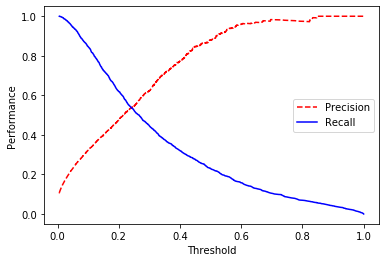

In [280]:
# Threshold-PR curve
train_loss, y_true, y_prob = trainer.eval_step(dataloader=train_dataloader)
precisions, recalls, thresholds = precision_recall_curve(y_true.ravel(), y_prob.ravel())
plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label="Recall")
plt.ylabel("Performance")
plt.xlabel("Threshold")
plt.legend(loc='best')

In [281]:
# Best threshold for f1
threshold = find_best_threshold(y_true.ravel(), y_prob.ravel())
threshold

0.21466048

In [282]:
# Determine predictions using threshold
test_loss, y_true, y_prob = trainer.eval_step(dataloader=test_dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

In [283]:
# Evaluate
performance = get_performance(
    y_true=y_test, y_pred=y_pred, classes=label_encoder.classes)
print (json.dumps(performance['overall'], indent=2))

{
  "precision": 0.34976369495166487,
  "recall": 0.2389525693244905,
  "f1": 0.25651611949847763,
  "num_samples": 480.0
}


In [284]:
@widgets.interact(tag=list(sorted_tags_by_f1.keys()))
def display_tag_analysis(tag='transformers'):
    # Performance
    print (json.dumps(performance["class"][tag], indent=2))
    
    # TP, FP, FN samples
    index = label_encoder.class_to_index[tag]
    tp, fp, fn = [], [], []
    for i in range(len(y_test)):
        true = y_test[i][index]
        pred = y_pred[i][index]
        if true and pred:
            tp.append(i)
        elif not true and pred:
            fp.append(i)
        elif true and not pred:
            fn.append(i)
            
    # Samples
    num_samples = 3
    if len(tp): 
        print ("\n=== True positives ===")
        for i in tp[:num_samples]:        
            print (f"  {X_test_raw[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fp): 
        print ("=== False positives === ")
        for i in fp[:num_samples]:        
            print (f"  {X_test_raw[i]}")
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")
    if len(fn): 
        print ("=== False negatives ===")
        for i in fn[:num_samples]:        
            print (f"  {X_test_raw[i]}") 
            print (f"    true: {label_encoder.decode([y_test[i]])[0]}")
            print (f"    pred: {label_encoder.decode([y_pred[i]])[0]}\n")

interactive(children=(Dropdown(description='tag', index=3, options=('interpretability', 'segmentation', 'produ…

In [285]:
# Save artifacts
dir = Path("rnn")
dir.mkdir(parents=True, exist_ok=True)
tokenizer.save(fp=Path(dir, 'tokenzier.json'))
label_encoder.save(fp=Path(dir, 'label_encoder.json'))
torch.save(best_model.state_dict(), Path(dir, 'model.pt'))
with open(Path(dir, 'performance.json'), "w") as fp:
    json.dump(performance, indent=2, sort_keys=False, fp=fp)

Inference

In [286]:
# Initialize model
model = RNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    rnn_hidden_dim=rnn_hidden_dim, hidden_dim=hidden_dim, 
    dropout_p=dropout_p, num_classes=num_classes)
model = model.to(device)
print (f"Model:\n{model.named_parameters}")

Model:
<bound method Module.named_parameters of RNN(
  (embeddings): Embedding(136, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


In [287]:
# Load artifacts
device = torch.device("cpu")
tokenizer = Tokenizer.load(fp=Path(dir, 'tokenzier.json'))
label_encoder = LabelEncoder.load(fp=Path(dir, 'label_encoder.json'))
model = RNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    rnn_hidden_dim=rnn_hidden_dim, hidden_dim=hidden_dim, 
    dropout_p=dropout_p, num_classes=num_classes)
model.load_state_dict(torch.load(Path(dir, 'model.pt'), map_location=device))
model.to(device)

RNN(
  (embeddings): Embedding(136, 128, padding_idx=0)
  (rnn): GRU(128, 128, batch_first=True, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)

In [288]:
# Initialize trainer
trainer = Trainer(model=model, device=device)

In [289]:
# Dataloader
text = "Transfer learning with BERT for self-supervised learning"
X = np.array(tokenizer.texts_to_sequences([preprocess(text)]))
y_filler = label_encoder.encode([np.array([label_encoder.classes[0]]*len(X))])
dataset = RNNTextDataset(X=X, y=y_filler)
dataloader = dataset.create_dataloader(batch_size=batch_size)

In [290]:
# Inference
y_prob = trainer.predict_step(dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])
label_encoder.decode(y_pred)

[[]]

limitation: since we're using character embeddings our encoded sequences are quite long (>100), the RNNs may potentially be suffering from memory issues. We also can't process our tokens in parallel because we're restricted by sequential processin

# Transformers w/ Contextual Embeddings